# Heart Stroke Prediction

In [216]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [217]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Preprocessing the Dataset

In [218]:
df.pop('id')

0        9046
1       51676
2       31112
3       60182
4        1665
        ...  
5105    18234
5106    44873
5107    19723
5108    37544
5109    44679
Name: id, Length: 5110, dtype: int64

In [219]:
#Replacing Null Values with Mean
bmi_mean = df['bmi'].mean()
df['bmi'].fillna(bmi_mean, inplace=True)

In [220]:
from sklearn.preprocessing import LabelEncoder
ENC = LabelEncoder()

In [221]:
gender = ENC.fit_transform(df['gender'])
smoking_status = ENC.fit_transform(df['smoking_status'])
ever_married = ENC.fit_transform(df['ever_married'])
work_type = ENC.fit_transform(df['work_type'])
Residence_type = ENC.fit_transform(df['Residence_type'])

In [222]:
df['gender'] = gender
df['smoking_status'] = smoking_status
df['ever_married'] = ever_married
df['work_type'] = work_type
df['Residence_type'] = Residence_type

In [223]:
y = df['stroke']
X = df.drop('stroke', axis=1)

In [224]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20, test_size=0.3)

# Standard Scaling

In [225]:
std=StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.fit_transform(X_test)

# SVM

In [232]:
svm = SVC()

In [233]:
clf = svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)

In [242]:
accuracy_score(y_test, y_pred)

0.9510763209393346

In [229]:
conf_matrix = confusion_matrix(y_test, y_pred)

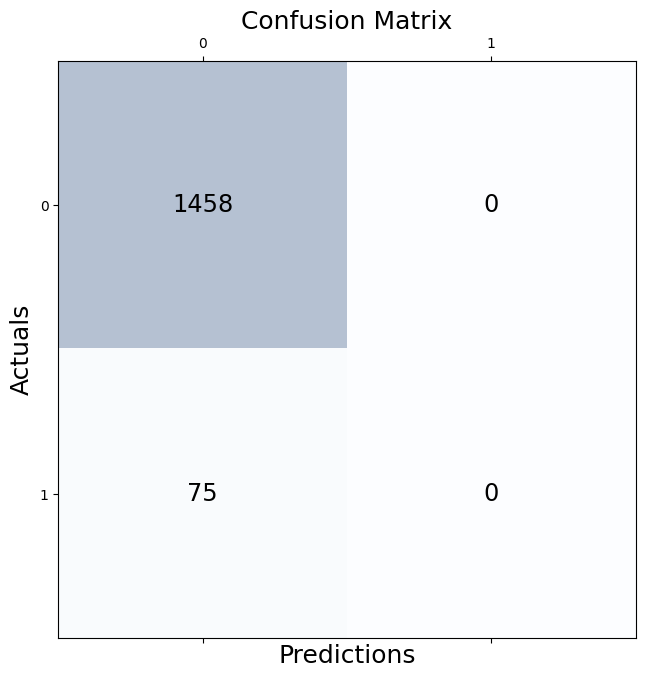

In [230]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [240]:
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       1.00      0.00      0.00        75

    accuracy                           0.95      1533
   macro avg       0.98      0.50      0.49      1533
weighted avg       0.95      0.95      0.93      1533

